In [19]:
from shapely.geometry import Polygon
import geopandas as gpd
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])


polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])


df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})


# GeoPandas Set Operations: Overlaying Geometries

This notebook explores the powerful `overlay` function in GeoPandas, which allows for combining two GeoDataFrames based on their spatial relationships. This is analogous to set operations (union, intersection, difference) in mathematics, but applied to geometric features.

Understanding how to effectively use `overlay` is crucial for advanced geospatial analysis, enabling tasks such as identifying overlapping areas, finding non-overlapping regions, or combining attributes from intersecting features.

We will cover the following `how` parameters:
- `intersection`: Returns the overlapping areas.
- `union`: Returns all areas from both GeoDataFrames, combining attributes where geometries overlap.
- `difference`: Returns the areas from the first GeoDataFrame that do not overlap with the second.
- `symmetric_difference`: Returns areas that are in either GeoDataFrame but not in their intersection.

Let's dive in and see how these operations work with practical examples!

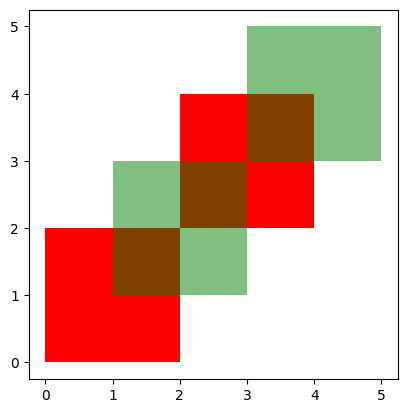

In [20]:
ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5);

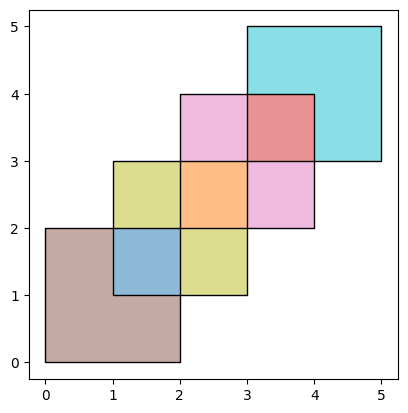

In [21]:

#When using how='union', all those possible geometries are returned:

res_union = df1.overlay(df2, how='union')

res_union

ax = res_union.plot(alpha=0.5, cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

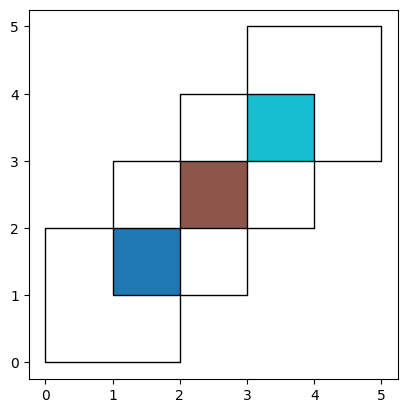

In [22]:
res_intersection = df1.overlay(df2, how='intersection')

res_intersection

ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

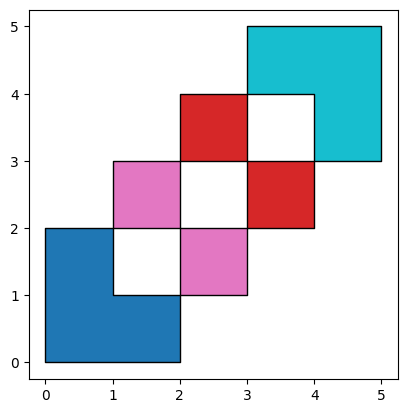

In [23]:
res_symdiff = df1.overlay(df2, how='symmetric_difference')

res_symdiff


ax = res_symdiff.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

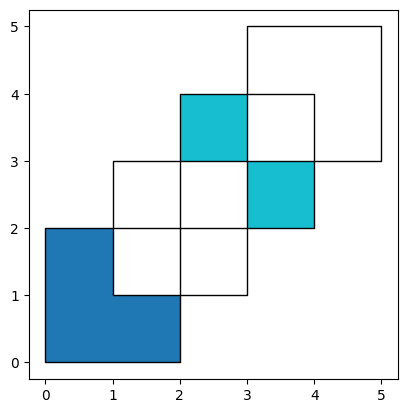

In [24]:
res_difference = df1.overlay(df2, how='difference')

res_difference

ax = res_difference.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

In [25]:
import geodatasets

chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))

groceries = gpd.read_file(geodatasets.get_path("geoda.groceries"))


chicago = chicago.to_crs("ESRI:102003")

groceries = groceries.to_crs("ESRI:102003")

<Axes: >

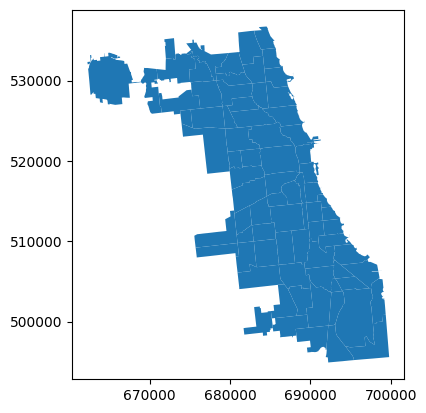

In [26]:
chicago.plot()

In [27]:
groceries.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: USA_Contiguous_Albers_Equal_Area_Conic
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

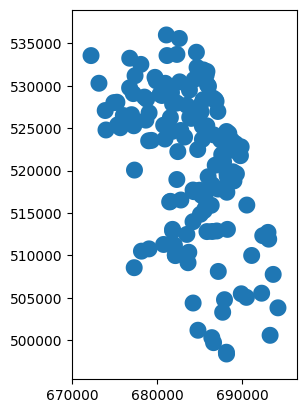

In [28]:

groceries['geometry']= groceries.buffer(1000)

groceries.plot();


<Axes: >

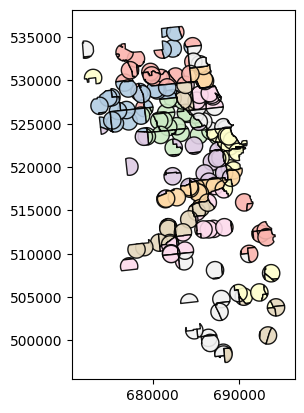

In [33]:
chicago_cores = chicago.overlay(groceries, how='intersection')

chicago_cores.plot(alpha=0.9, edgecolor='k', cmap='Pastel1')

<Axes: >

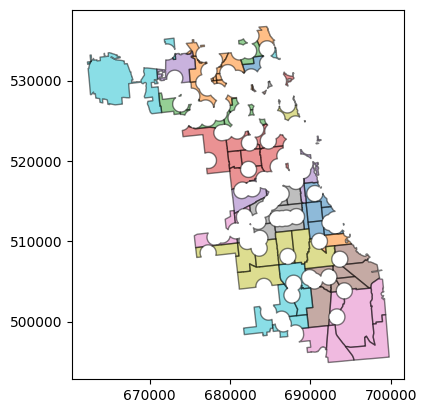

In [34]:
chicago_peripheries = chicago.overlay(groceries, how='difference')

chicago_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10')